## Preprocessing

In the previous data audit we have seen that there is a lot of monthly data missing for 2007 and 2008. Additionnally 2007 and 2008 do not have all locations and also fall into a the millenium drought period so we will drop these years from the dataset. 

We will also drop the location Uluru as it has only data for very few years and since it is in the middle of the desert while most of the other locations are close to the seaside we consider it as a location we extreme weather and contrary to the other locations there is no village or city. 

Once we drop all this data, we have too look again the distribution of NaN values. 

We also saw that the the years 2011, 2012 and 2013 have all one month with no data at all. We will create this data by taking the average of the month before and after the month that is missing. 

### Import relevant libraries 

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [228]:
df = pd.read_csv('weatherAUS.csv')
display(df.head())
df.info()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [229]:
df.Date = pd.to_datetime(df.Date)
df['Month'] = df.Date.dt.month
df['Year'] = df.Date.dt.year
df['Day'] = df.Date.dt.day
df 

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Year,Day
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.1,8.0,NaN,16.9,21.8,No,No,12,2008,1
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1007.8,NaN,NaN,17.2,24.3,No,No,12,2008,2
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1008.7,NaN,2.0,21.0,23.2,No,No,12,2008,3
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1012.8,NaN,NaN,18.1,26.5,No,No,12,2008,4
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1006.0,7.0,8.0,17.8,29.7,No,No,12,2008,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,1020.3,NaN,NaN,10.1,22.4,No,No,6,2017,21
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,1019.1,NaN,NaN,10.9,24.5,No,No,6,2017,22
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,1016.8,NaN,NaN,12.5,26.1,No,No,6,2017,23
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,1016.5,3.0,2.0,15.1,26.0,No,No,6,2017,24


In [230]:
df = df[(df['Year'] != 2007) & (df['Year'] != 2008)]

In [231]:
df = df[(df['Location'] != 'Uluru')]

In the data set they are also certain locations with two sites:

Melbourne and Melbourne Airport
Perth and Perth Airport
Sydney and Sydney Airport,

Basically these are the same locations so let's keep the location with less NaN values. 

In [235]:
display(df[df.Location == 'Melbourne'].isna().sum())
display(df[df.Location == 'MelbourneAirport'].isna().sum())
display(df[df.Location == 'Perth'].isna().sum())
display(df[df.Location == 'PerthAirport'].isna().sum())
display(df[df.Location == 'Sydney'].isna().sum())
display(df[df.Location == 'SydneyAirport'].isna().sum())

Date                0
Location            0
MinTemp           480
MaxTemp           481
Rainfall          758
Evaporation         3
Sunshine            1
WindGustDir        14
WindGustSpeed      14
WindDir9am         48
WindDir3pm         12
WindSpeed9am        1
WindSpeed3pm        0
Humidity9am       482
Humidity3pm       487
Pressure9am       480
Pressure3pm       483
Cloud9am         1034
Cloud3pm         1106
Temp9am           481
Temp3pm           484
RainToday         758
RainTomorrow      758
Month               0
Year                0
Day                 0
dtype: int64

Date              0
Location          0
MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       3
Sunshine          1
WindGustDir      15
WindGustSpeed    15
WindDir9am       40
WindDir3pm       13
WindSpeed9am      1
WindSpeed3pm      0
Humidity9am       8
Humidity3pm       9
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          1
Temp9am           0
Temp3pm           0
RainToday         0
RainTomorrow      0
Month             0
Year              0
Day               0
dtype: int64

Date               0
Location           0
MinTemp            0
MaxTemp            0
Rainfall           0
Evaporation        1
Sunshine           5
WindGustDir        5
WindGustSpeed      5
WindDir9am       127
WindDir3pm         7
WindSpeed9am       0
WindSpeed3pm       1
Humidity9am        4
Humidity3pm        4
Pressure9am        1
Pressure3pm        1
Cloud9am           2
Cloud3pm           4
Temp9am            0
Temp3pm            1
RainToday          0
RainTomorrow       0
Month              0
Year               0
Day                0
dtype: int64

Date              0
Location          0
MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       1
Sunshine          5
WindGustDir      46
WindGustSpeed    46
WindDir9am       40
WindDir3pm        1
WindSpeed9am      2
WindSpeed3pm      1
Humidity9am       0
Humidity3pm       1
Pressure9am       2
Pressure3pm       1
Cloud9am          2
Cloud3pm          4
Temp9am           0
Temp3pm           1
RainToday         0
RainTomorrow      0
Month             0
Year              0
Day               0
dtype: int64

Date               0
Location           0
MinTemp            4
MaxTemp            2
Rainfall           7
Evaporation       46
Sunshine          16
WindGustDir      703
WindGustSpeed    703
WindDir9am        50
WindDir3pm        30
WindSpeed9am      26
WindSpeed3pm      22
Humidity9am       15
Humidity3pm       12
Pressure9am       20
Pressure3pm       19
Cloud9am         568
Cloud3pm         563
Temp9am            5
Temp3pm            4
RainToday          7
RainTomorrow       7
Month              0
Year               0
Day                0
dtype: int64

Date              0
Location          0
MinTemp           1
MaxTemp           0
Rainfall          4
Evaporation      46
Sunshine         16
WindGustDir      51
WindGustSpeed    51
WindDir9am        8
WindDir3pm        4
WindSpeed9am      3
WindSpeed3pm      1
Humidity9am       2
Humidity3pm       4
Pressure9am       8
Pressure3pm       3
Cloud9am          4
Cloud3pm          0
Temp9am           1
Temp3pm           1
RainToday         4
RainTomorrow      4
Month             0
Year              0
Day               0
dtype: int64

In each case the Airport location has less NaN values. So lets drop the other locations.

In [236]:
df = df[(df['Location'] != 'Melbourne')] 
df = df[(df['Location'] !='Perth')]
df = df[(df['Location'] !='Sydney')]

In [237]:
data_audit = pd.DataFrame(df.dtypes, columns=['data_type'])
data_audit['missing_data'] = np.round((df.isna().sum() / len(df)) *100,2)
data_audit

,data_type,missing_data
Date,datetime64[ns],0.00
Location,object,0.00
MinTemp,float64,0.72
MaxTemp,float64,0.58
Rainfall,float64,1.82
Evaporation,float64,45.90
Sunshine,float64,51.25
WindGustDir,object,6.86
WindGustSpeed,float64,6.82
WindDir9am,object,7.68


In [238]:
df.isna().sum()

Date                 0
Location             0
MinTemp            955
MaxTemp            763
Rainfall          2415
Evaporation      60823
Sunshine         67912
WindGustDir       9097
WindGustSpeed     9035
WindDir9am       10183
WindDir3pm        4123
WindSpeed9am      1674
WindSpeed3pm      2990
Humidity9am       2113
Humidity3pm       3977
Pressure9am      14459
Pressure3pm      14427
Cloud9am         52675
Cloud3pm         56135
Temp9am           1247
Temp3pm           3100
RainToday         2415
RainTomorrow      2421
Month                0
Year                 0
Day                  0
dtype: int64

After dropping 2007 and 2008 as well as the location Uluru and dropping Melbourne, Perth as well as Sydney (to keep only the respective airport locations), we can see that we still have a lot of missing data for Evaporation, Sunshine, Clouds 9am and Clouds 3pm.

Let's check if the missing values are evenly distributed.
https://github.com/ResidentMario/missingno

You have to install it with:
pip install missingno  

<Axes: >

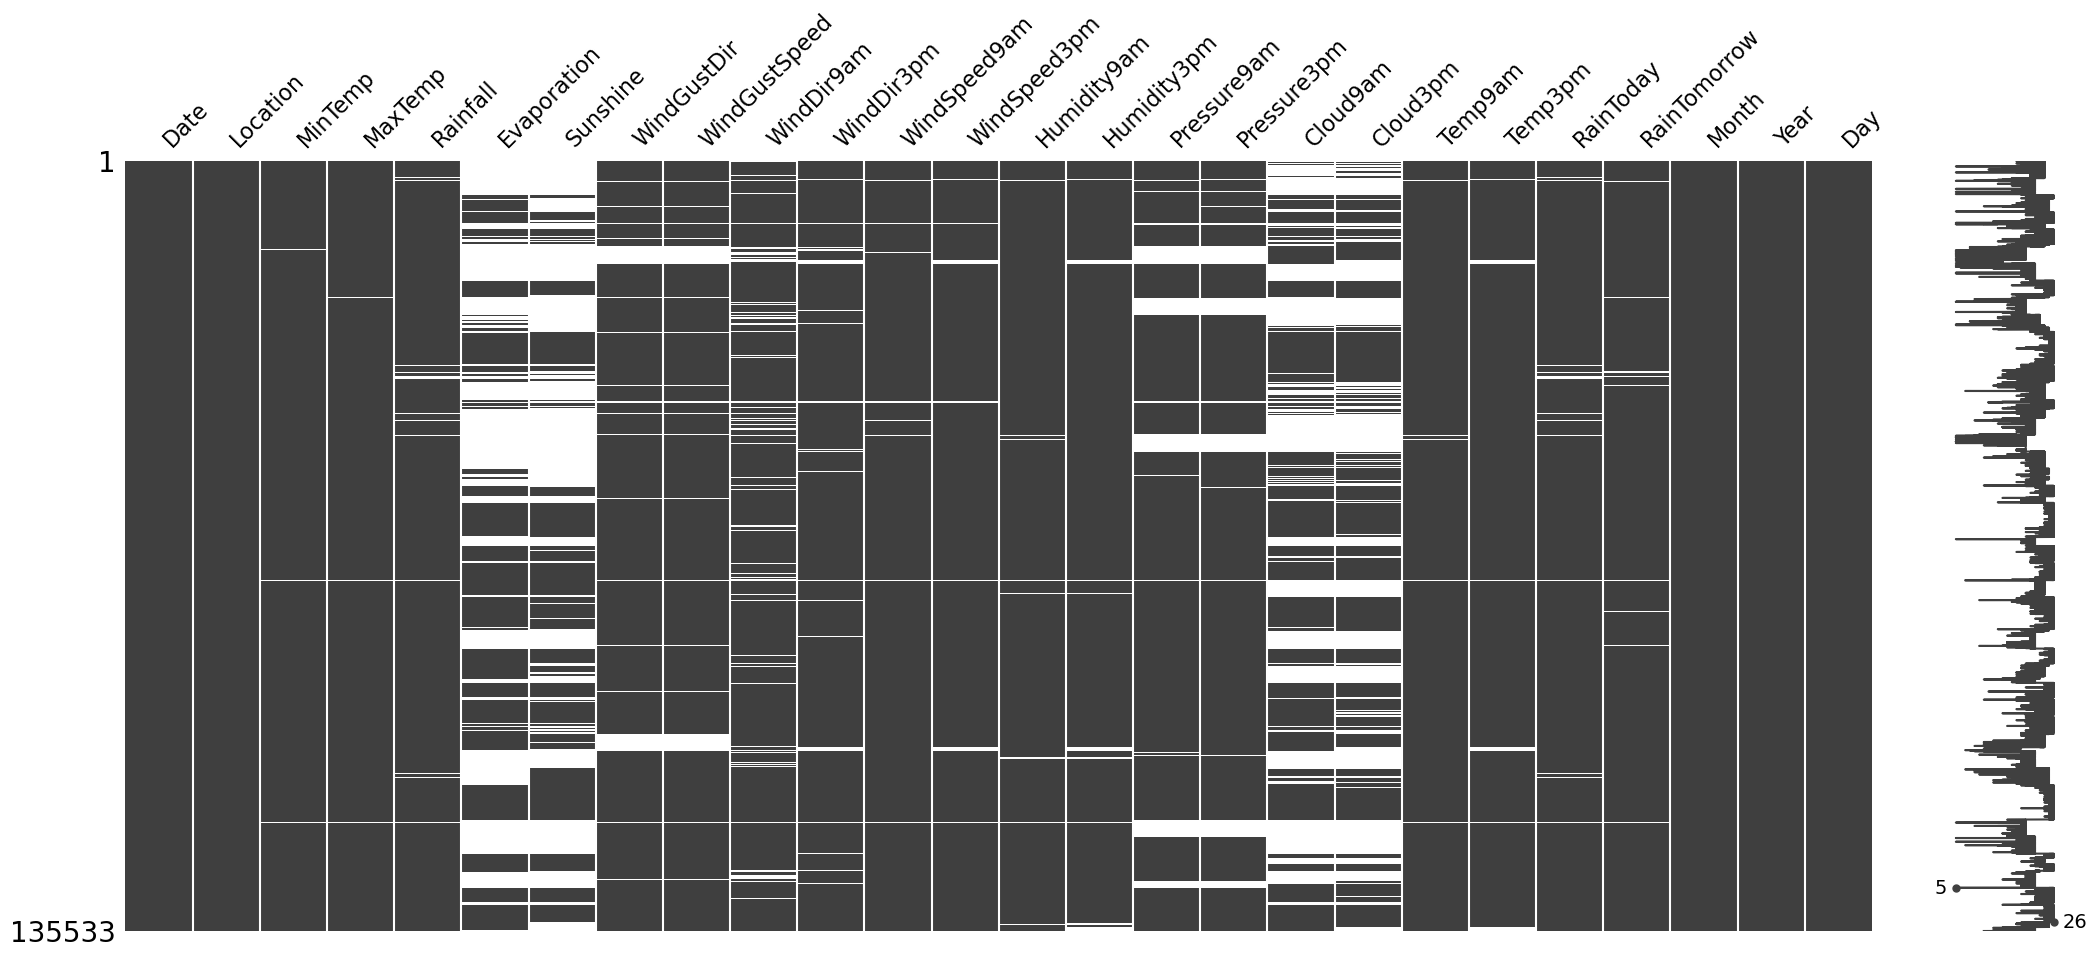

In [186]:
import missingno as msno
msno.matrix(df)

From the this graph we don't get the feeling that Evaporation, Sunshine and Cloud data is very evenly distributed. Sometimes you have very big chunks of white colored blocks and they are not evenly distributed.

There are several ways to deal with missing data, the most classic one is too simply drop all NaN values. 

### Strategy 1: Drop all NaNs

This strategy is preferred when the data to be deleted is small and Missing Completely at Random. 

In [216]:
display(df.info())
df_drop = df.dropna()
display(df_drop.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135533 entries, 31 to 143881
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           135533 non-null  datetime64[ns]
 1   Location       135533 non-null  object        
 2   MinTemp        134578 non-null  float64       
 3   MaxTemp        134770 non-null  float64       
 4   Rainfall       133118 non-null  float64       
 5   Evaporation    74709 non-null   float64       
 6   Sunshine       67616 non-null   float64       
 7   WindGustDir    126431 non-null  object        
 8   WindGustSpeed  126493 non-null  float64       
 9   WindDir9am     125223 non-null  object        
 10  WindDir3pm     131403 non-null  object        
 11  WindSpeed9am   133859 non-null  float64       
 12  WindSpeed3pm   132542 non-null  float64       
 13  Humidity9am    133416 non-null  float64       
 14  Humidity3pm    131552 non-null  float64       
 15 

None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51655 entries, 6049 to 142302
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           51655 non-null  datetime64[ns]
 1   Location       51655 non-null  object        
 2   MinTemp        51655 non-null  float64       
 3   MaxTemp        51655 non-null  float64       
 4   Rainfall       51655 non-null  float64       
 5   Evaporation    51655 non-null  float64       
 6   Sunshine       51655 non-null  float64       
 7   WindGustDir    51655 non-null  object        
 8   WindGustSpeed  51655 non-null  float64       
 9   WindDir9am     51655 non-null  object        
 10  WindDir3pm     51655 non-null  object        
 11  WindSpeed9am   51655 non-null  float64       
 12  WindSpeed3pm   51655 non-null  float64       
 13  Humidity9am    51655 non-null  float64       
 14  Humidity3pm    51655 non-null  float64       
 15  Pressure9am    

None

In [215]:
print('Number of locations in df:', len(df.Location.unique()))
print('Number of locations in df_drop:', len(df_drop.Location.unique()))

Number of locations in df: 46
Number of locations in df_drop: 24


The problem is that with this strategy we loose about 24 locations out of 46. So more than half of the locations are gone in our dataset.So we can really say that the data to be deleted is small nor that is Missing Complety at random. 

And of course by simply dropping all nan values, we do not take into account the time serie dimension of the data. We are dealing with data over several years and several months.

Since for certain columns we have over 40% of missing data the amount of missing data is big and we have also seen it is linked to certain locations. That means we can also dismiss strategies such as replacing missing value by a constant or Mean/Median/Mode imputations because the size of the missing data is too big and linked specifically to certain locations.

###  Strategy 2: Forward Fill & Backward Fill

The Forward Fill strategy is also called Last Observation Carried Forward (LOCF), meaning missing values are filled by the last observed values. 

Similarly,the Backward Fill strategy or Next Observation Carried Backward (NOCB), is just the opposite of LOCF, we fill in the missing values with the next observed values in the dataset. 

However both strategies are not very useful because for certain locations we no Sunshine values at all. So we cannot fill in the missing data with the last observed or next observed values because there are no such values. 

### Strategy 3: Drop the locations with the most missing data

As we have seen the classical methods such as dropping all NaN or using Mean/Mode/Median Imputations as well as often used time serie methods such as LOCF and NOCB do not work in our case because the missing data is linked to some specific locations, i.e. not missing completely at random. So maybe we should have another look at the locations that disappear when we drop all data. 

For a start let's picture them on a map and see if they are in any way clustered.

In [275]:
no_missing_data_locations = df_drop.Location.unique()
coordinates = [
    (-36.0804772, 146.9164691, 'Albury'),
    (-33.8882071, 150.7917044, 'BadgerysCreek'),
    (-31.4983333, 145.8347222, 'Cobar'),
    (-30.296241, 153.113529, 'CoffsHarbour'),
    (-29.4648, 149.8415, 'Moree'),
    (-32.92715, 151.77647, 'Newcastle'),
    (-33.2815, 151.5675, 'NorahHead'),
    (-29.0283, 167.948, 'NorfolkIsland'),
    (-33.75089, 150.69427, 'Penrith'),
    (-33.6019444, 150.75, 'Richmond'),
    (-33.8548157, 151.2164539, 'Sydney'),
    (-35.115, 147.3677778, 'WaggaWagga'),
    (-32.7986, 151.842, 'Williamtown'),
    (-34.424, 150.8931, 'Wollongong'),
    (-35.2975906, 149.1012676, 'Canberra'),
    (-35.4248, 149.0887, 'Tuggeranong'),
    (-35.5297222, 148.7711111, 'MountGinini'),
    (-37.5622, 143.8503, 'Ballarat'),
    (-36.75818, 144.28024, 'Bendigo'),
    (-38.1075, 147.0636, 'Sale'),
    (-37.8142176, 144.9631608, 'Melbourne'),
    (-34.2029, 142.2202, 'Mildura'),
    (-36.332, 141.6503, 'Nhil'),
    (-38.3635, 141.6053, 'Portland'),
    (-37.7108, 145.0833, 'Watsonia'),
    (-37.9225, 141.2738, 'Dartmoor'),
    (-27.4689682, 153.0234991, 'Brisbane'),
    (-16.9206, 145.7709, 'Cairns'),
    (-28.0167, 153.4, 'GoldCoast'),
    (-19.2569391, 146.8239536, 'Townsville'),
    (-34.9281805, 138.5999312, 'Adelaide'),
    (-37.8284, 140.7801, 'MountGambier'),
    (-34.4683, 138.9958, 'Nuriootpa'),
    (-31.1994, 136.8254, 'Woomera'),
    (-35.0031, 117.865, 'Albany'),
    (-34.0263, 115.1001, 'Witchcliffe'),
    (-31.665, 116.0183, 'PearceRAAF'),
    (-31.9527121, 115.8604796, 'Perth'),
    (-32.9831, 121.643, 'SalmonGums'),
    (-34.9772, 116.7329, 'Walpole'),
    (-42.8825, 147.33, 'Hobart'),
    (-41.4385, 147.1347, 'Launceston'),
    (-23.698, 133.8816, 'AliceSprings'),
    (-12.4628, 130.8417, 'Darwin'),
    (-14.4667, 132.2667, 'Katherine'),
    (-25.3444, 131.0369, 'Uluru'), 
    (-33.9399227, 151.1752769, 'SydneyAirport'), 
    (-31.9374, 115.9665, 'PerthAirport'), 
    (-37.6697, 144.8491, 'MelbourneAirport')
]

coordinates1 = []
coordinates2 = []

for i in range(0,len(coordinates)):
       if coordinates[i][2] in no_missing_data_locations: 
            coordinates2.append(coordinates[i])
       else:
           coordinates1.append(coordinates[i]) 

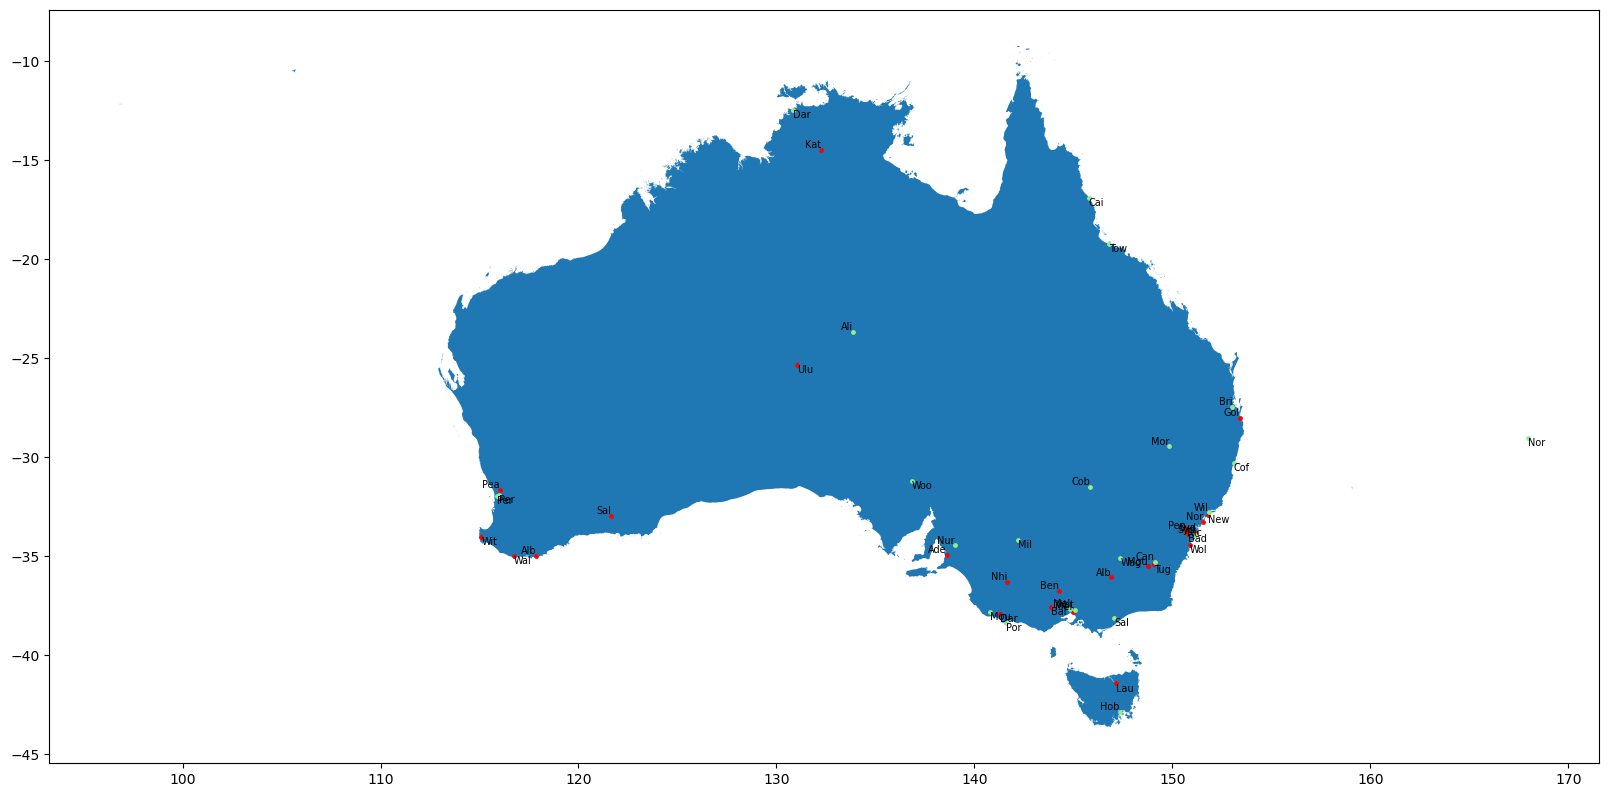

In [326]:
import geopandas as gpd

# Path to the shapefile
shapefile_path = "AUS_2021_AUST_GDA2020.shp"

# Read the shapefile
gdf = gpd.read_file(shapefile_path)

# Convert coordinates to GeoDataFrame
gdf_coordinates1 = gpd.GeoDataFrame(geometry=gpd.points_from_xy([coord[1] for coord in coordinates1], [coord[0] for coord in coordinates1]))
gdf_coordinates2 = gpd.GeoDataFrame(geometry=gpd.points_from_xy([coord[1] for coord in coordinates2], [coord[0] for coord in coordinates2]))

# Plot the shapefile
ax = gdf.plot(figsize=(20, 20))

# Plot the coordinates
gdf_coordinates1.plot(ax=ax, color='red', marker='o', markersize=6)
gdf_coordinates2.plot(ax=ax, color='lightgreen', marker='o', markersize=6)

# Annotate the points with names
counter = 0
for x, y, name in coordinates:
    counter += 1
    ha = 'left' if counter % 2 == 0 else 'right'
    # Alternate vertical alignment
    va = 'top' if counter % 2 == 0 else 'bottom'
    ax.text(y, x,name[:3],fontsize=7, ha=ha, va=va)

In [277]:
#check data size when locations with missing data are dropped
df[df['Location'].isin(no_missing_data_locations)].shape

(69207, 26)

### Audit of Strategy 3 dataset

In [278]:
df_new = df[df['Location'].isin(no_missing_data_locations)]

In [280]:
df_new.isna().sum()

Date                 0
Location             0
MinTemp             80
MaxTemp             66
Rainfall           958
Evaporation       8781
Sunshine         14243
WindGustDir       1686
WindGustSpeed     1661
WindDir9am        2531
WindDir3pm         855
WindSpeed9am       657
WindSpeed3pm       650
Humidity9am        375
Humidity3pm        303
Pressure9am        654
Pressure3pm        644
Cloud9am          7045
Cloud3pm          8278
Temp9am            131
Temp3pm             83
RainToday          958
RainTomorrow       963
Month                0
Year                 0
Day                  0
dtype: int64

In [281]:
data_audit = pd.DataFrame(df_new.dtypes, columns=['data_type'])
data_audit['missing_data'] = np.round((df_new.isna().sum() / len(df_new)) *100,2)
data_audit

,data_type,missing_data
Date,datetime64[ns],0.00
Location,object,0.00
MinTemp,float64,0.12
MaxTemp,float64,0.10
Rainfall,float64,1.38
Evaporation,float64,12.69
Sunshine,float64,20.58
WindGustDir,object,2.44
WindGustSpeed,float64,2.40
WindDir9am,object,3.66


Strategy 3 greatly reduced the missing data and we got rid of some of the strong location dependency for missing data. 

The Sunshine column is still the one with the highest number of missing data but now it is down to 20.58%. For evaporation it is down to 12.69% and for the clouds variables it is down to 10.18 (Cloud9am) and down to 11.96 (Cloud3pm).

<Axes: >

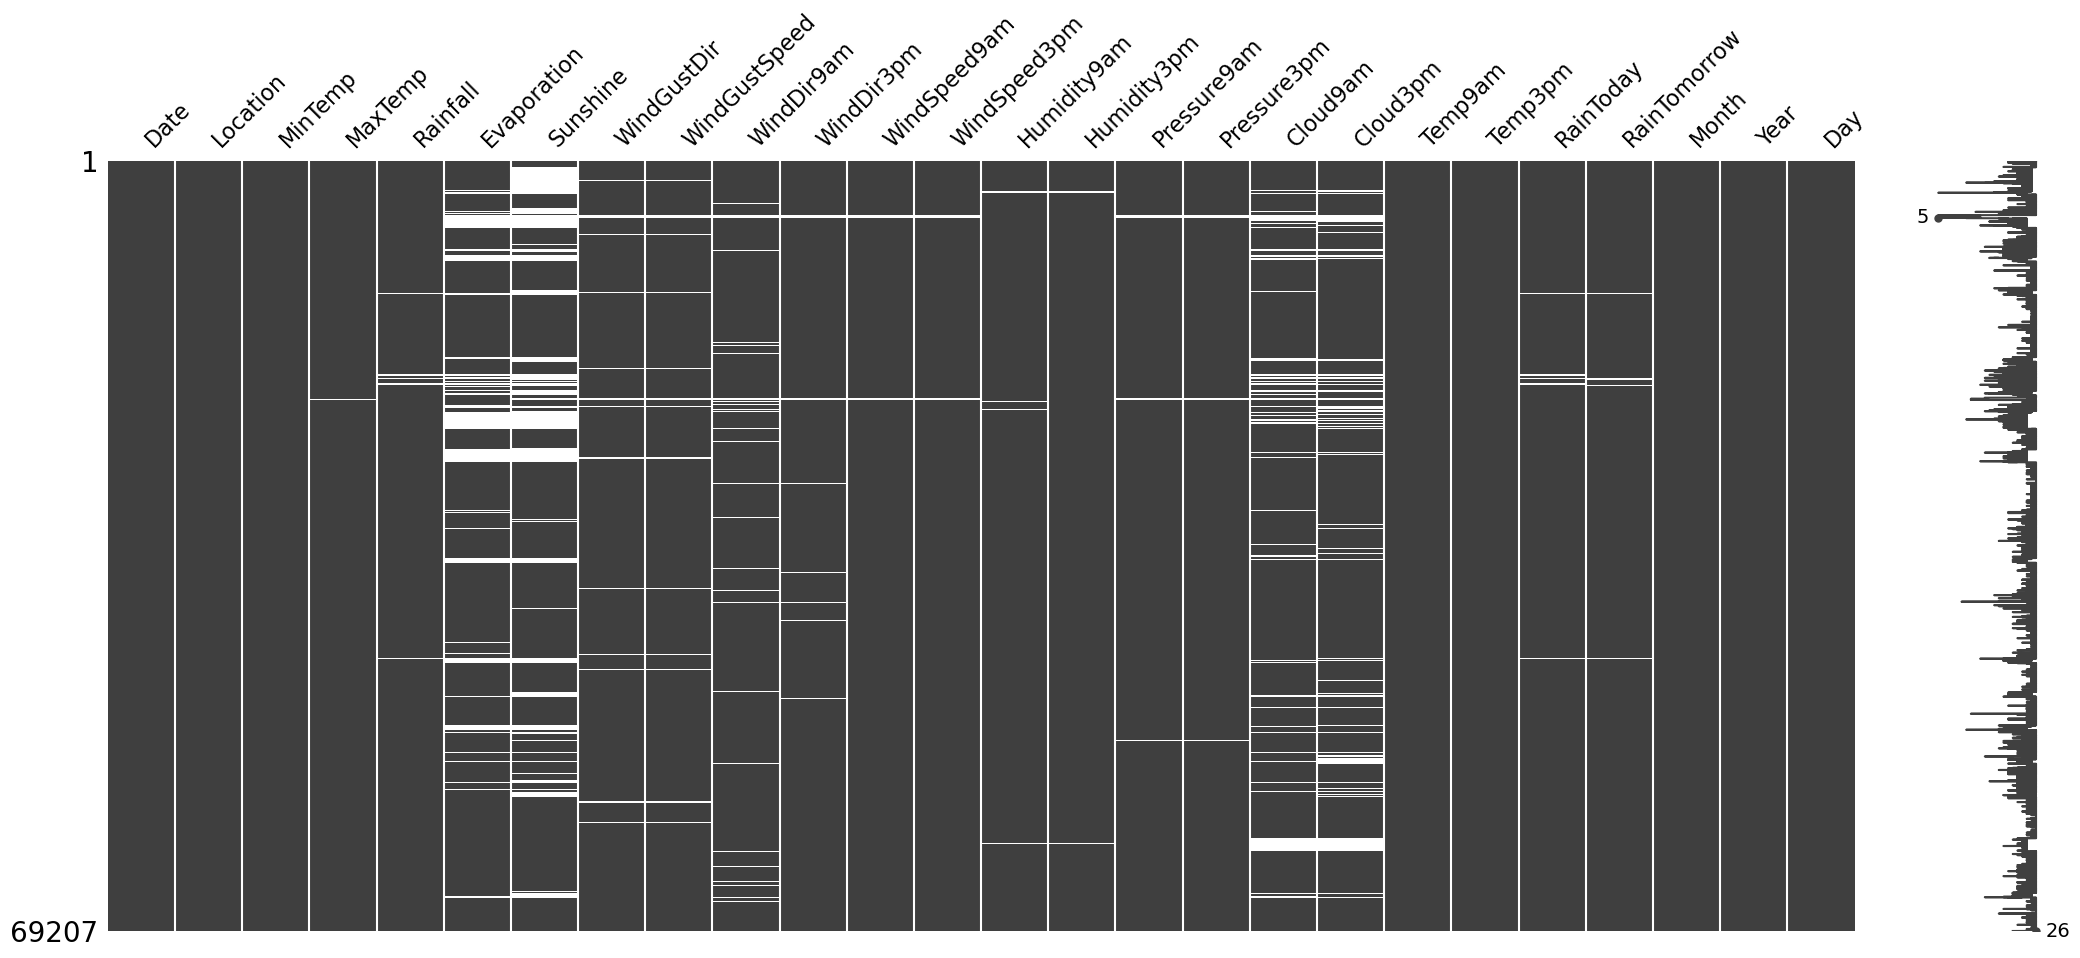

In [322]:
msno.matrix(df_new)

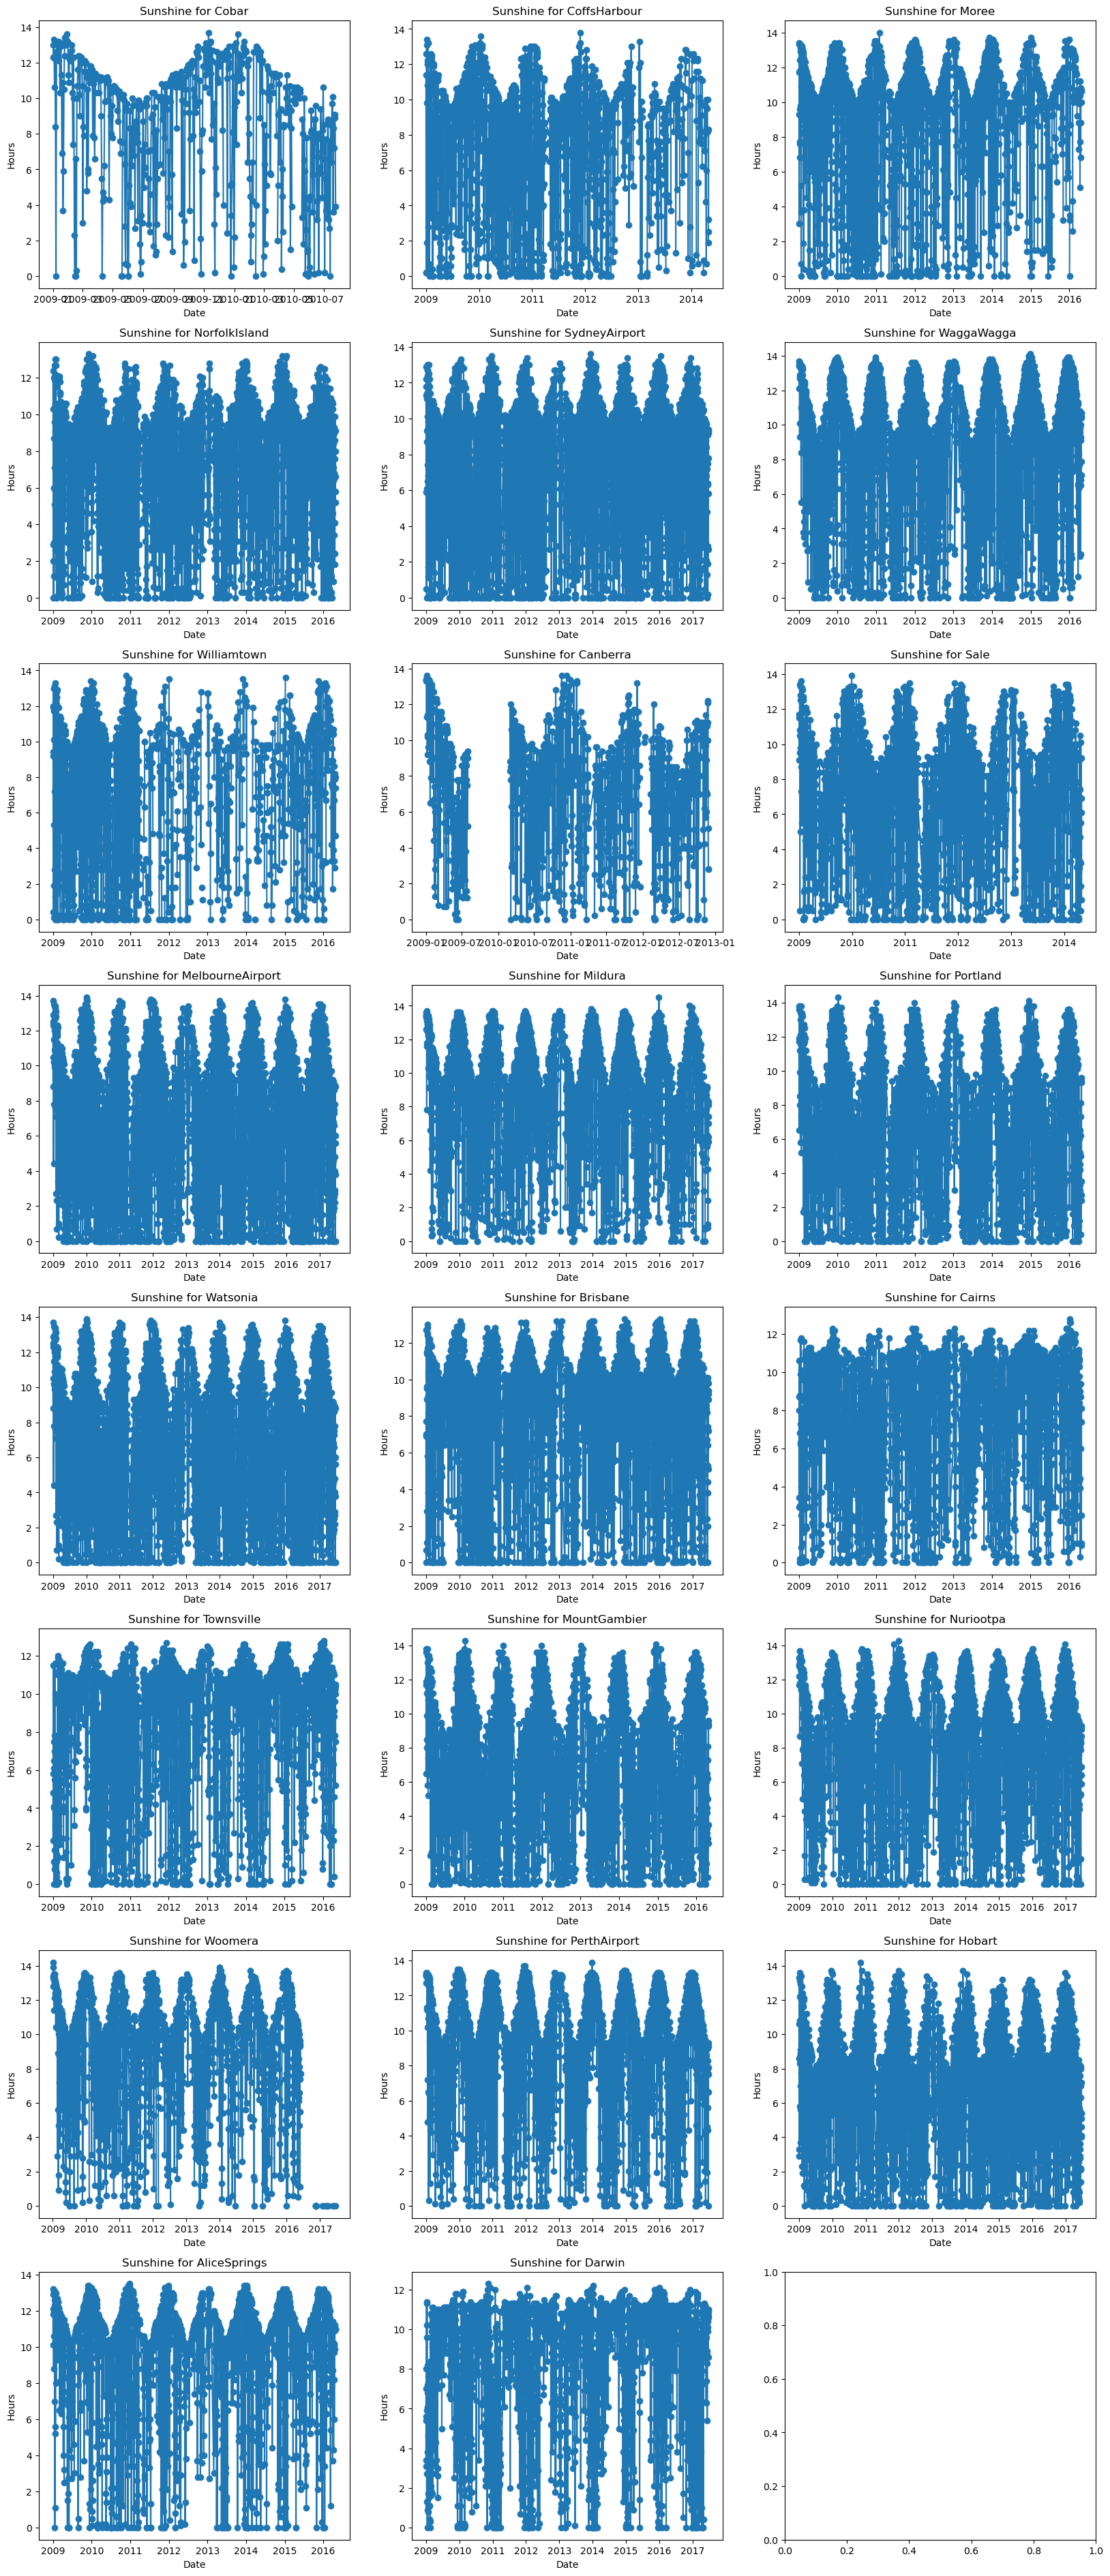

In [323]:
num_locations = len(df_new['Location'].unique())
num_cols = 3 # Number of columns for the subplots
num_rows = (num_locations + num_cols - 1) // num_cols

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 6))

# Flatten the array for easy iteration
axs = axs.flatten()
locations = []
for i,location in enumerate(df_new['Location'].unique()):
    df_location = df_new.loc[(df_new.Location==location)]
    axs[i].plot(df_location.Date, df_location.Sunshine, marker='o', linestyle='-')
    axs[i].set_title(f'Sunshine for {location}')
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Hours')

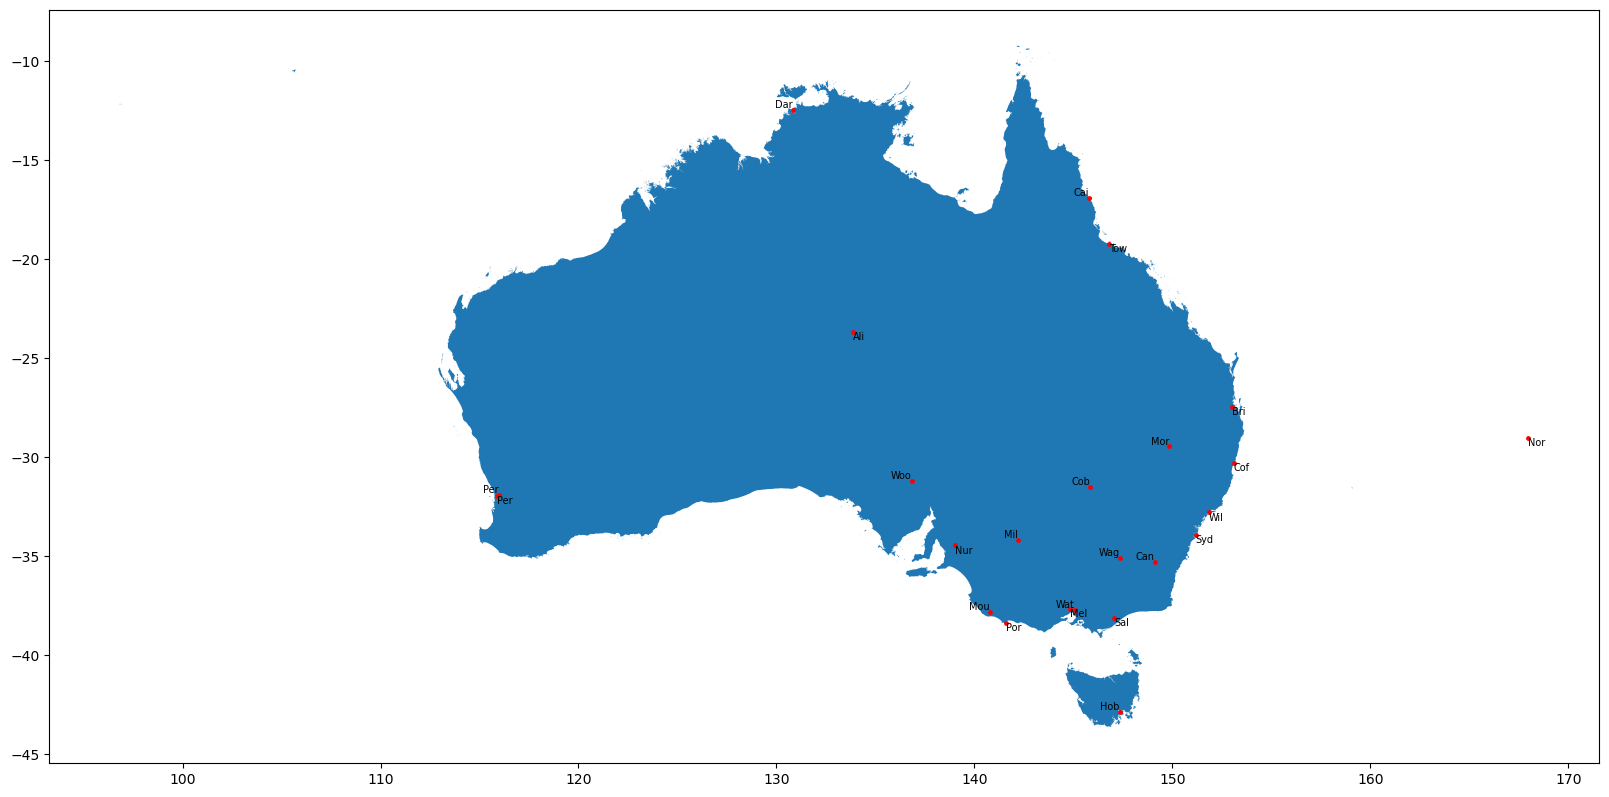

In [328]:
gdf_coordinates2 = gpd.GeoDataFrame(geometry=gpd.points_from_xy([coord[1] for coord in coordinates2], [coord[0] for coord in coordinates2]))

# Plot the shapefile
ax = gdf.plot(figsize=(20, 20))

# Plot the coordinates
gdf_coordinates2.plot(ax=ax, color='red', marker='o', markersize=6)

# Annotate the points with names
counter = 0
for x, y, name in coordinates2:
    counter += 1
    ha = 'left' if counter % 2 == 0 else 'right'
    # Alternate vertical alignment
    va = 'top' if counter % 2 == 0 else 'bottom'
    ax.text(y, x,name[:3],fontsize=7, ha=ha, va=va)

### Foward and Backward Fill

Let's try the two common time series interpolation strategies (foward and backward fill) for filling the data and check on sunshine data (the column with the most missing data points) how the data looks like after interpolation.

#### Foward Fill

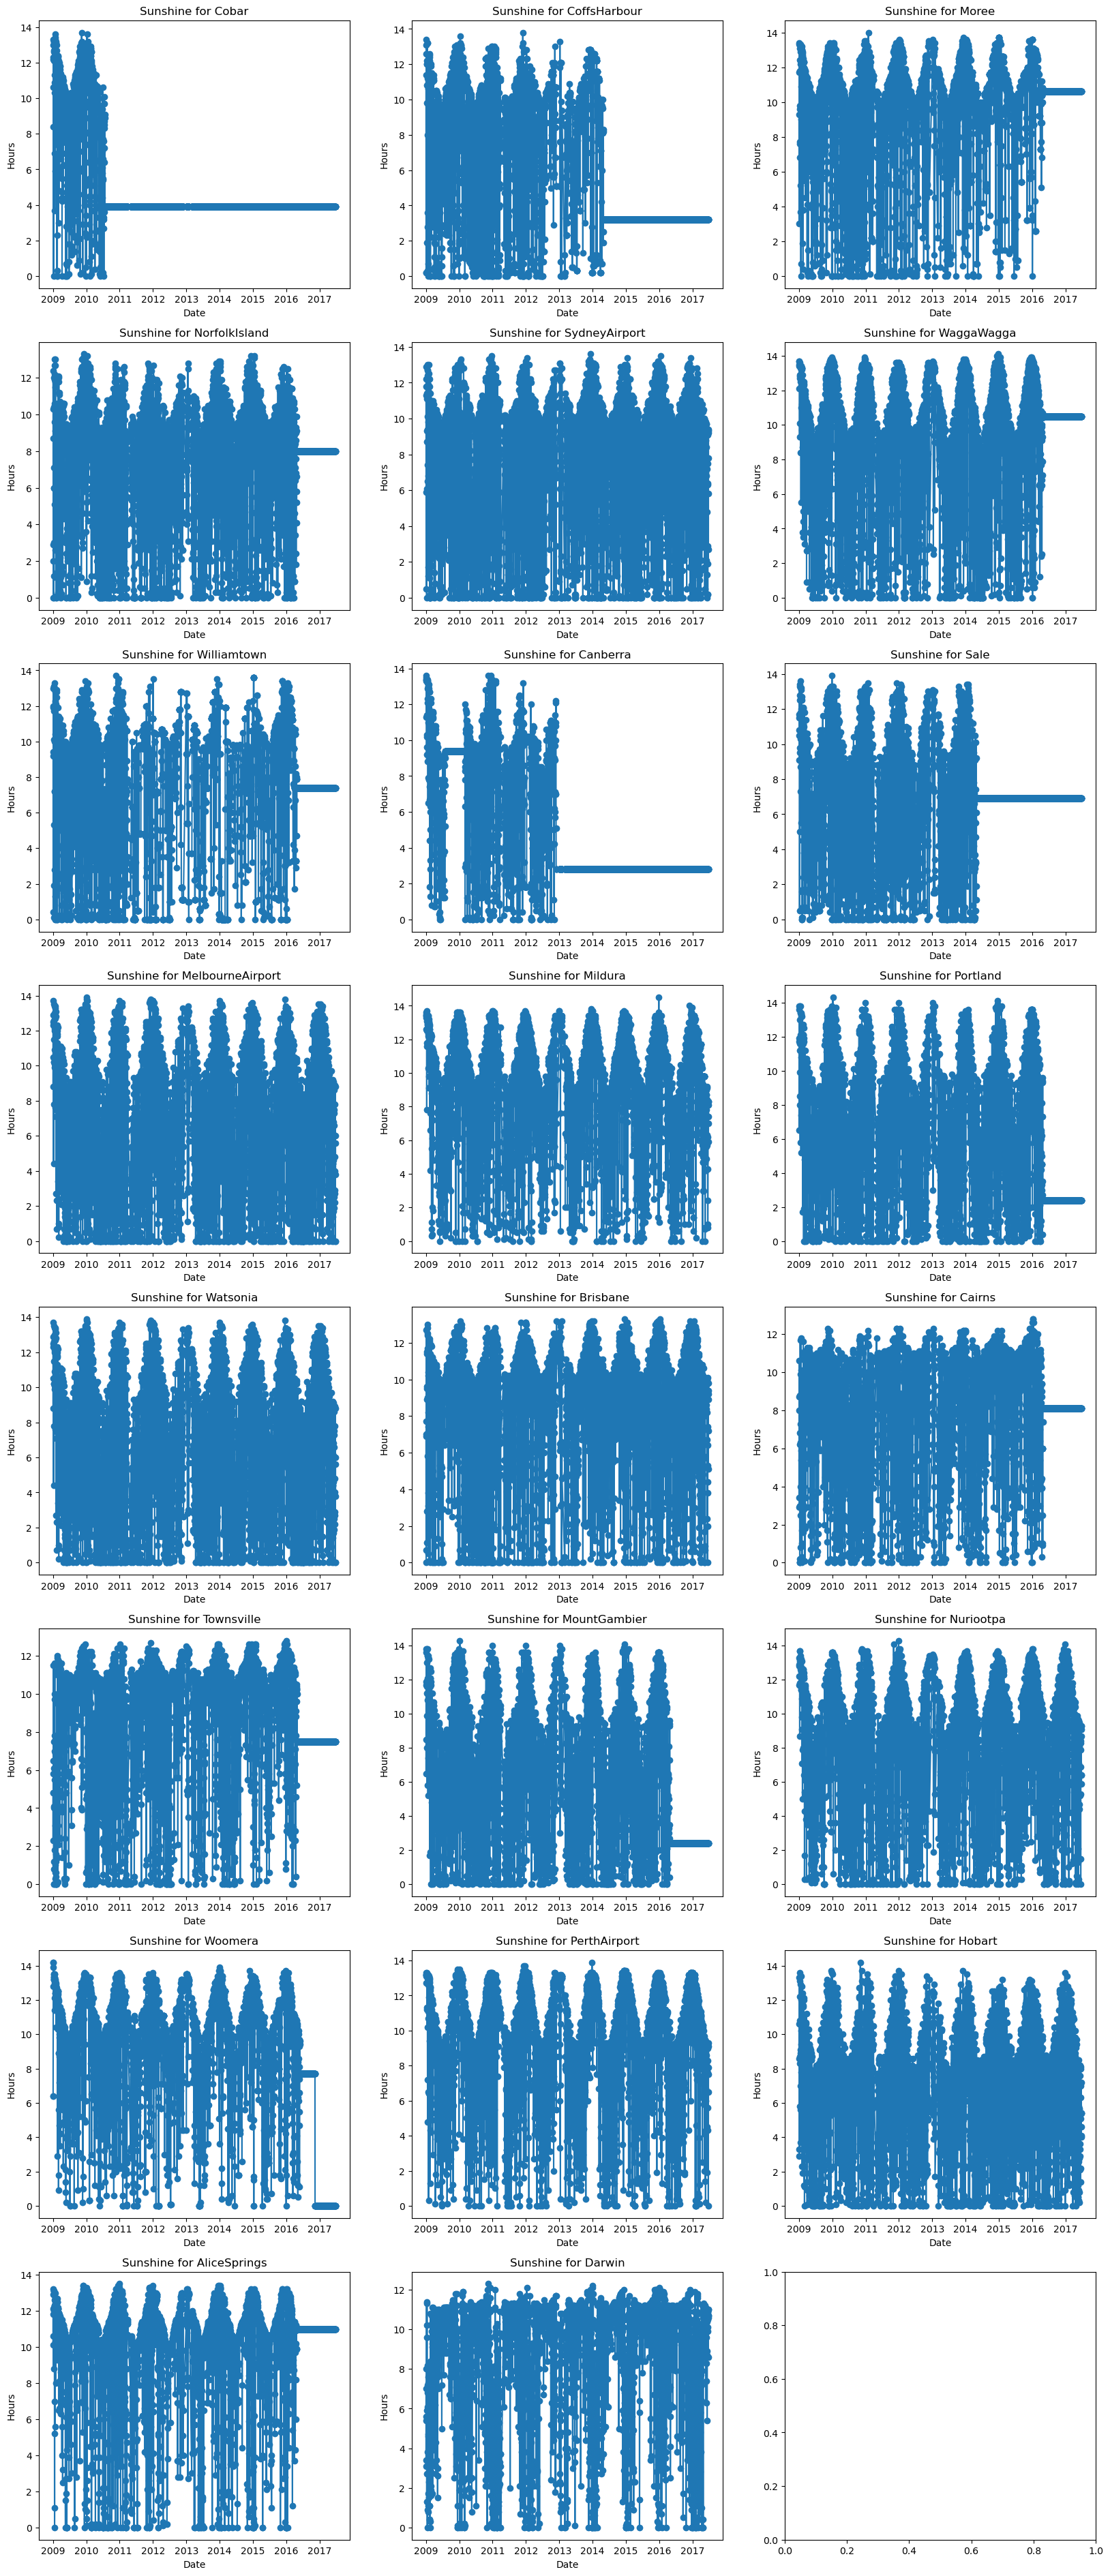

In [333]:
df_imputed = df_new.interpolate(method='ffill', limit_direction='forward', order=2)
num_locations = len(df_imputed['Location'].unique())
num_cols = 3 # Number of columns for the subplots
num_rows = (num_locations + num_cols - 1) // num_cols

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 6))

# Flatten the array for easy iteration
axs = axs.flatten()
locations = []
for i,location in enumerate(df_imputed['Location'].unique()):
    df_location = df_imputed.loc[(df_imputed.Location==location)]
    axs[i].plot(df_location.Date, df_location.Sunshine, marker='o', linestyle='-')
    axs[i].set_title(f'Sunshine for {location}')
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Hours')

This does not look like a satisfactory strategy as it does not fit with the overall trend. The backward fill will most likely have the same problem.

#### Backward Fill

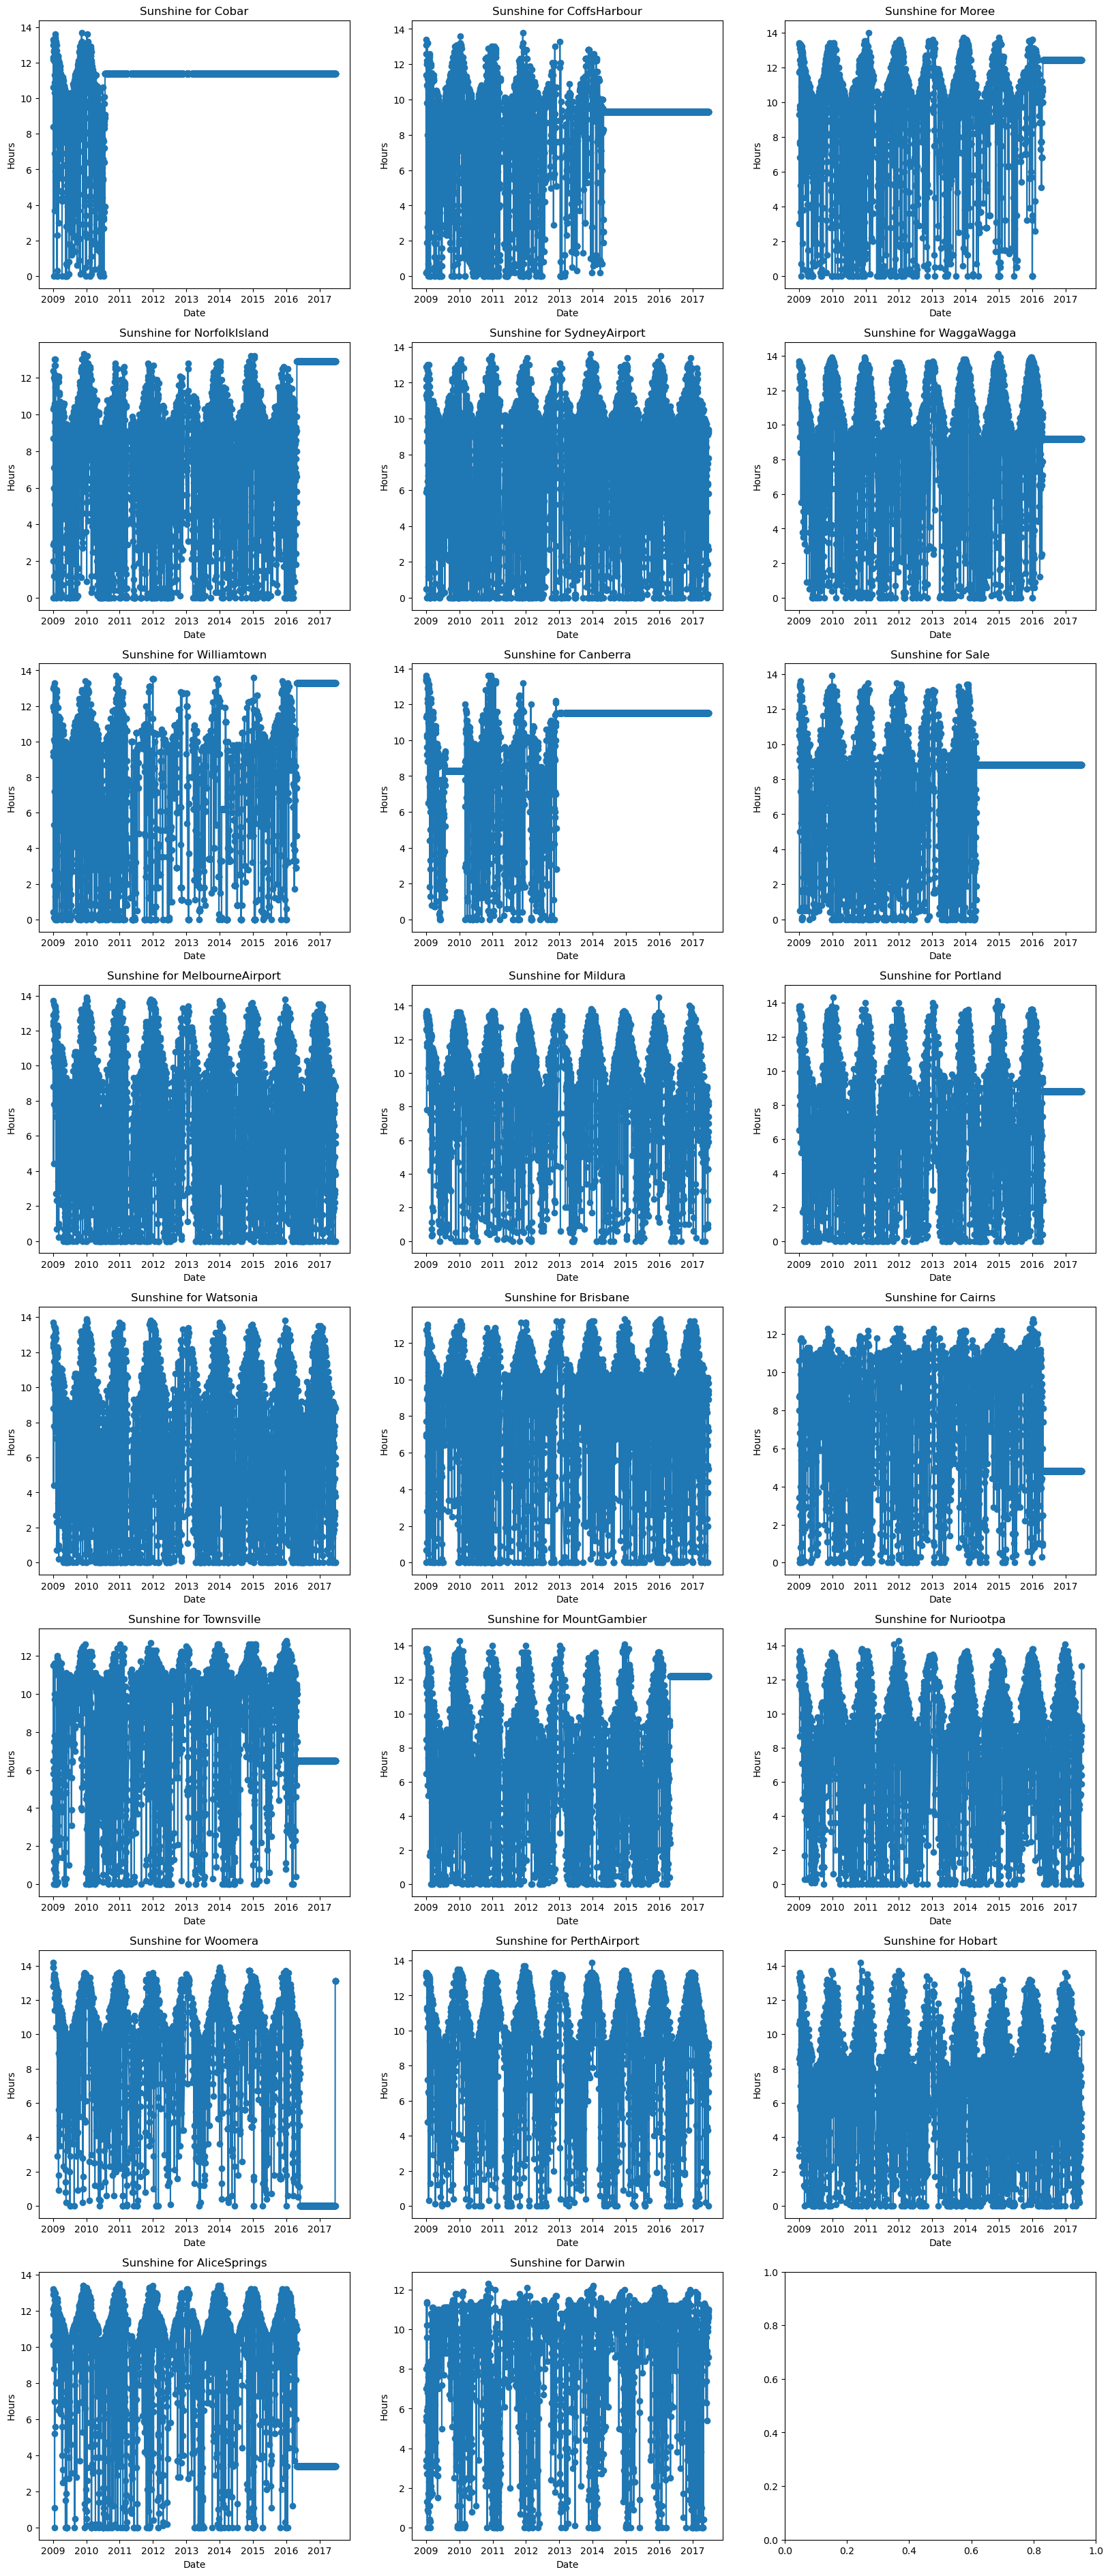

In [338]:
df_imputed = df_new.interpolate(method='bfill', limit_direction='backward', order=2)
num_locations = len(df_imputed['Location'].unique())
num_cols = 3 # Number of columns for the subplots
num_rows = (num_locations + num_cols - 1) // num_cols

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 6))

# Flatten the array for easy iteration
axs = axs.flatten()
locations = []
for i,location in enumerate(df_imputed['Location'].unique()):
    df_location = df_imputed.loc[(df_imputed.Location==location)]
    axs[i].plot(df_location.Date, df_location.Sunshine, marker='o', linestyle='-')
    axs[i].set_title(f'Sunshine for {location}')
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Hours')

Same as before, the missing data fill in is not very satisfactory as it does not follow the overall trend